<a href="https://colab.research.google.com/github/Kwhite2020/FAU/blob/main/vacuum_cleaner_agent_AI_assignment_1_problem_10_Kenneth_White.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Utility Score: 95
Execution Time: 0.001628 seconds
Memory Usage: 4.95 KB


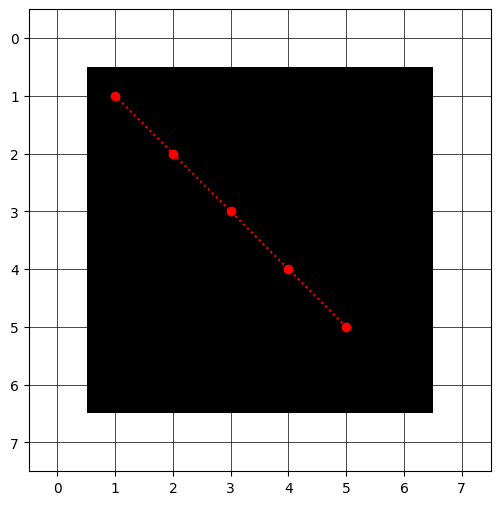

In [26]:
## Author: Kenneth White. Date: 01/31/2025
## Class: CAP 6635 Artificial Intelligence

#Vacuum cleaner agent that cleans up all the dirt then returns to the charging station after cleaning with the highest utility score

#import necesssary libraries fro functions usesd
import heapq #python moduale to import the priority que algorithm
import math
import matplotlib.pyplot as plt
import numpy as np
import time
import tracemalloc

#using euclidean distance to measure distance between nodes (a,b)
def euclidean_distance(a, b):
    return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)



#utilizing A* function to measure movement with accosiated cost
def a_star(grid, start, goal):
    rows, cols = len(grid), len(grid[0])
    moves = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]
    move_costs = {(-1, 0): 1, (1, 0): 1, (0, -1): 1, (0, 1): 1,
                  (-1, -1): 1.414, (-1, 1): 1.414, (1, -1): 1.414, (1, 1): 1.414}

    open_set = []  #Priority queue (min-heap), chooses best path
    heapq.heappush(open_set, (0, start))  # #adds open_set to heap(f_score, node)

    came_from = {}  #Stores the best path to each node
    g_score = {start: 0}  #Cost from start to this node
    f_score = {start: euclidean_distance(start, goal)}  #Estimated cost to goal

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]  #Reverse to get correct order of heap

        for move in moves:
            neighbor = (current[0] + move[0], current[1] + move[1])
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor[0]][neighbor[1]] != -1:  # Stay within bounds and avoid walls
                tentative_g_score = g_score[current] + move_costs[move]
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + euclidean_distance(neighbor, goal)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor)) #retrives lowest f score

    return None  # No path found


#mesure the cloest dirt position to the agent's current position
def clean_all_dirt(grid, start):
    tracemalloc.start() #starts recoding the path the agent takes
    start_time = time.time() #records the time the agent takes to execute the path

    dirt_positions = [(r, c) for r in range(len(grid)) for c in range(len(grid[0])) if grid[r][c] == 0]
    total_cleaned = 0
    total_cost = 0
    current_position = start
    full_path = [] #stores list of position the agent visits

    while dirt_positions:
        dirt_positions.sort(key=lambda pos: euclidean_distance(current_position, pos))
        closest_dirt = dirt_positions.pop(0)
        path_to_dirt = a_star(grid, current_position, closest_dirt)

        if path_to_dirt:
            full_path.extend#(path_to_dirt[1:])  # Avoid duplicating start position
            total_cost += len(path_to_dirt) - 1
            grid[closest_dirt[0]][closest_dirt[1]] = 1  # Mark as cleaned
            total_cleaned += 1
            current_position = closest_dirt

    path_to_station = a_star(grid, current_position, start)
    if path_to_station:
        full_path.extend(path_to_station[1:])
        total_cost = len(path_to_station) - 1

    utility_score = calculate_utility(total_cost, total_cleaned)
    execution_time = time.time() - start_time
    memory_usage = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()

    print(f"Utility Score: {utility_score}")
    print(f"Execution Time: {execution_time:.6f} seconds")
    print(f"Memory Usage: {memory_usage / 1024:.2f} KB")
    return full_path


#Calculates the utility score
def calculate_utility(g_score, cleaned_squares):
    return -g_score + (cleaned_squares * 10)


#plots the grid with the movement of the agent
def plot_grid(grid, path=None):
    plt.figure(figsize=(6,6))
    cmap = plt.get_cmap("gray_r")
    plt.imshow(grid, cmap=cmap, origin='upper')

    if path:
      x_coords, y_coords = zip(*path)  # Extract x and y coordinates from the path
      plt.plot(y_coords, x_coords, color='red', marker='o', linestyle='dotted')  # Plot the line
    plt.xticks(range(len(grid[0])))
    plt.yticks(range(len(grid)))
    plt.grid(visible=True, color='black', linewidth=0.5)
    plt.show()




# Define the 6x6 grid
#walls (-1),
#dirt (0),
#clean areas (1)

grid = np.array([
    [-1, -1, -1, -1, -1, -1, -1, -1],
    [-1,  1,  1,  1,  1,  1,  1, -1],
    [-1,  0,  0,  1,  1,  1,  1, -1],
    [-1,  1,  0,  0,  1,  1,  1, -1],
    [-1,  1,  1,  0,  0,  1,  1, -1],
    [-1,  1,  1,  1,  0,  0,  1, -1],
    [-1,  1,  1,  1,  1,  0,  0, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1],
])

start = (1,1)  # Charging station
path = clean_all_dirt(grid, start)
plot_grid(grid, path)

